In [5]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

using Plots

  Activating project at `~/Documents/GitHub/Phys215-202324-2/00-Intro`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202324-2/00-Intro/Manifest.toml`


# Logistic return map chaos

Chaos is the sensitivity of a system to initial condition.
One of the simplest system that exhibits chaos is the [Logistic Map](https://en.wikipedia.org/wiki/Logistic_map).
The logistic map is a discrete-time (iteration based) relation of the quantity being such that:
$$x_{t+1} = f(x_{t})$$
where the $f(x_{t})$ is the function that provides the new value of $x$ at a later time $t+1$ given the state at $t$.
In general, $x_t$ may be a vector.

For simplicity, we choose a one-dimensional chaotic system:
$$x_{t+1} = rx_t(1-x_t)$$
where $x_t$ is most commonly associated with a self-limiting growth of a system (e.g. population, mass, etc).

# Implementation

One intuitive way to implement this is to create a vector, say `x` from length one (or length zero) such that `x = [x_1]` (or `x = []`) with `x_1` as the first value.
The following gives the one that starts with length zero.

In [6]:
r = 3.7 # parameter

x = [ rand() ] # Start with a vector with initial value. Random value.

1-element Vector{Float64}:
 0.27271197772763167

Since the process involves updating of a former value, it is also important to set a variable for both the new and avoid serial update of variables.

In [7]:
# Let's try again..
xnew = rand()
x = [ xnew ] # Start.

# Mapping again..
xold = xnew # Ensure no serial update; Not necessary for 1D such as this
xnew = r*xold*(1-xold)
x = [x; xnew] # Append to the last

2-element Vector{Float64}:
 0.7652173918096439
 0.6647410198022524

In [8]:
# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = [x; xnew] # vcat(x,xnew);
end

In [9]:
@show length(x);

length(x) = 202


# Plot of results

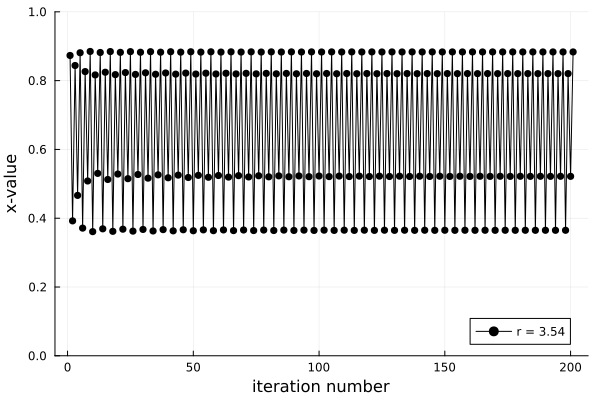

In [12]:
plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Again..

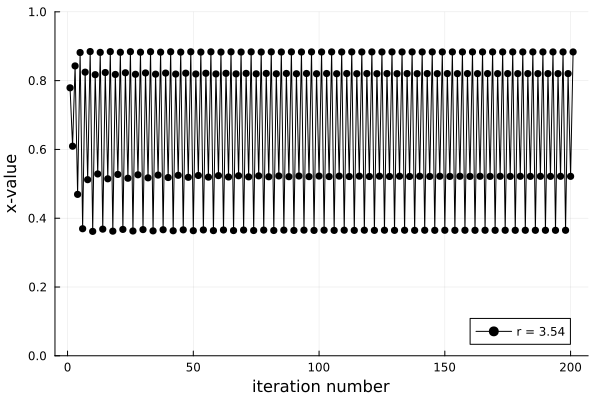

In [13]:
xnew = rand()
x = [ xnew ] # Start.

r = 3.54

# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = [x; xnew];# vcat(x,xnew);
end

plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Packaging procedures as one function

_Object Oriented Programming (OOP) vs Julia programming_ is a topic that is important to distinguish.
Moving from `c` to `c++` (or `Java`) to `Python` makes a lot of difference.

[OOP paradigm](https://en.wikipedia.org/wiki/Object-oriented_programming#Features) --as usual in `Python` (strictly in `Java`)-- is important for three principles: (1) encapsulation, (2) inheritance, and (3) polymorphism.
While different from the classical OOP, the _Julia paradigm_ also provides a different kind of implementing the same principles.

One can think [Julia](https://en.wikipedia.org/wiki/Julia_(programming_language)) as a procedure-(or methods-)based programming (functional programming) due to the inherent use of functions and variables.
However, unlike the typical `c` programming paradigm, Julia considers everything as an object.
Julia, also reflects reality by way of using _prototype_ for all variables.
Other [features]("https://en.wikipedia.org/wiki/Julia_(programming_language)#Language_features") are listed in the Wiki entry.

All Julia Functions are objects that processes other objects (including Functions themselves0.
Here, we use Functions to package a set of procedures done to a given set of objects (parameters are objects, too).

Since we would like to use `generate()` as the function name, our defition should not clash with any existing one.

In [ ]:
? generate

In [14]:
# input:
#   r::Float
#   N::Integer
# output:
#   x::Vector

function generate( r::Float64, N::Int )
    # generating first entry..
    xval = rand();
    x = [ xval ];
    for _ in 2:N
        xval = r * xval * (1 - xval)
        x = vcat(x, xval)
    end
    return x;
end

generate( r ) = generate( r, 200 ) # default to N = 200

generate (generic function with 2 methods)

In [15]:
function generate( r::String )
    println("This is a differently generated "*r*".")
end

generate (generic function with 3 methods)

In [16]:
generate("Hello")

This is a differently generated Hello.


In [17]:
function generate( r::Float64; N=300 )
    # generating first entry..
    xval = rand();
    x = [ xval ];
    for _ in 2:N
        xval = r * xval * (1 - xval)
        x = vcat(x, xval)
    end
    return x;
end

generate (generic function with 4 methods)

In [18]:
methods(generate)

# 4 methods for generic function "generate" from Main:
 [1] generate(r::Float64; N)
     @ ~/Documents/GitHub/Phys215-202324-2/00-Intro/explore-logistic-chaos-map.ipynb:1
 [2] generate(r::String)
     @ ~/Documents/GitHub/Phys215-202324-2/00-Intro/explore-logistic-chaos-map.ipynb:1
 [3] generate(r::Float64, N::Int64)
     @ ~/Documents/GitHub/Phys215-202324-2/00-Intro/explore-logistic-chaos-map.ipynb:7
 [4] generate(r)
     @ ~/Documents/GitHub/Phys215-202324-2/00-Intro/explore-logistic-chaos-map.ipynb:18

In [19]:
x = generate( 3.85 )

300-element Vector{Float64}:
 0.894558001153975
 0.36314733734271254
 0.8903946925859011
 0.37572913840292516
 0.9030434988879946
 0.33709036131587383
 0.8603227310516588
 0.46264498852677477
 0.9571277220036657
 0.15798184623659645
 ⋮
 0.15341696295731205
 0.5000387639719271
 0.9624999942148148
 0.13896095810249065
 0.4606556193690547
 0.956540275894154
 0.16004825947298545
 0.5175663343337155
 0.9613119820075932

In [20]:
function plotLogistic( r, N )
    x = generate(r,N)
    plt = plot( x
        ,markershape=:circle, markercolor=:black
        ,linecolor=:black
        ,label="r = "*string(r)
        ,xlabel="iteration number"
        ,ylabel="x-value"
        ,ylim=(0,1)
    )
    return plt
end

plotLogistic(r) = plotLogistic(r,200)

plotLogistic (generic function with 2 methods)

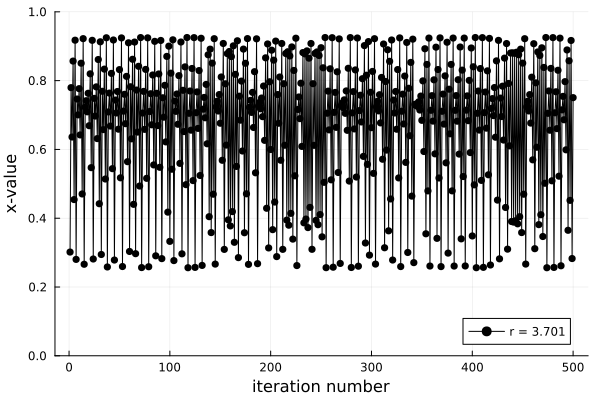

In [21]:
plotLogistic( 3.701, 500 )

# Fin

In [ ]:
x = rand(2)

In [ ]:
y() = rand(2)

In [ ]:
y()

In [ ]:
0:0.1:1

In [ ]:
?range